In [ ]:
#Script used for pie-wedge mesh, Feb 03,2020

In [1]:
import sys, os

sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats')
import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal
import importlib

In [2]:
print(meshing_ats.__file__)

/Users/ajc/Core/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats/meshing_ats.py


In [3]:
xl =pd.ExcelFile('../Topo_Profiles_Barrow.xlsx')
xl.sheet_names
print (xl.sheet_names)
data = xl.parse(sheet_name='Transect B, Area C')
keys = data.keys()

['Transect A, Polygon near ERT', 'Transect B, Polygon near ERT', 'Transect Area B', 'Transect A, Area C', 'Transect B, Area C', 'Repeat ERT Transect']


1


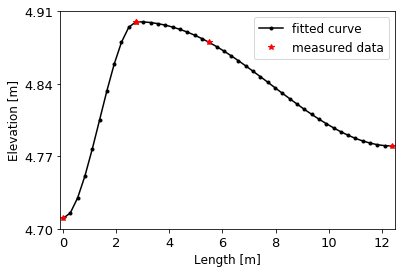

In [6]:
# smooth the topographic data : February 13 and trough cell inward oriented
length = len(data['Distance_m'])
x = []
z = []

x = np.array(data['Distance_m'][:46])
z = np.array(data['Z'][:46])

z = [z1 - 0.1127955 for z1 in z]
N3 = True
case = 1
if (case == 1):
    print (case)
    rim = 4.9
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.02, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
elif (case == 2):
    print (case)
    rim = 5.1
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.04, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
elif (case == 3):
    print (case)
    rim = 5.2
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.06, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
elif (case == 4):
    print (case)
    rim = 4.81
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.01, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')


z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:])))

z_smooth = np.array([round(s,4) for s in z_smooth])

plt.plot(x, z_smooth, '.-', color = 'k',label = 'fitted curve')
plt.plot(x1,z1,'*', color='r')
plt.plot(x2,z2,'*', color='r',label='measured data')

#print np.array(x), x1, x2
#print z, z1,z2
plt.ylabel('Elevation [m]', fontsize=12,fontweight='normal')
plt.xlabel('Length [m]',fontsize=12,fontweight='normal')
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.title('Mesh, Polygon Area C (Mesh-N3)')
plt.xlim(-0.1,12.5)
#plt.ylim(4.7,4.91)
plt.yticks(np.linspace(4.7,4.91,4))

plt.legend(fontsize=12)

outfile='/Users/ajc/Documents/MyPapers/TroughHydrodynamics/figures/Dec22_uniform_om/'
plt.savefig(outfile+'transect.pdf', bbox_inches='tight', dpi=500)

In [ ]:
print (x, z_smooth)
#print (len(x), len(z_smooth))
print (np.max(z_smooth)-0.5, z_smooth[10],x[10:12])

In [ ]:
x1 = [x[0],x[-1]]
z1 = [z_smooth[-1],z_smooth[-1]]
print (x1,z1)

In [ ]:
importlib.reload(meshing_ats)
site_area = 'C'
if site_area == 'A':
    arclen = 16
elif site_area == 'B':
    arclen = 6
elif site_area == 'C':
    arclen = 10
elif site_area == 'D':
    arclen = 10
#m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x,z_smooth, arclen, curved=False)
m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x1,z1, arclen, curved=False)

print (site_area, arclen)
m2.plot()

In [ ]:
x0,x1 = x[0], x[6]
z_upper = z_smooth[0] - 0.5
z_lower = z_smooth[0] - 3.5 #1.40296789
print (z_smooth[0], z_upper, z_lower)

P = (x1,z_upper)
Q = (x0, z_lower)

P =(x[6],0)
xx = np.linspace(0,x[6],7)
Q = (z_upper,z_lower)

slope = (z_upper-z_lower)/(x[6]-0)
y = z_upper + slope*(xx-x[6])
#print (m)
plt.plot(xx,y,'.')
print (y)#,x[6],x)



In [ ]:
#puttin ice-wedge underneath the trough
Depth = []

Zmesh_spacing = []
dz=0.02
for j in range(25):
    z1 = z_smooth[0] - dz*j
    Depth.append(z1)
    Zmesh_spacing.append(dz)
#print ('Upper mineral ', Depth)
dz=0.02
z = 0
for j in range(25,25+34):
    dz *= 1.075
    z = z + dz
    Depth.append(Depth[24] - z)
    Zmesh_spacing.append(dz)
    #print (Depth[-1])
#print ('Ice rich new ', z, Depth)

l = len(Depth)
print ('LL: ',l)
X = z_lower #1.40296789

IRZ_layer=-2000*np.ones((m2.num_cells(), l-25))

print (IRZ_layer.shape)

z_irz_start = z_smooth[0] - 0.5 # 50 cm deep

for i in range(m2.num_cells()):
    irz = []
    #break
    y1 = z_upper + slope*(x[i]-x[7])
    if y1 >y[-1]:
        #print (i,y1,y[-1])
        break
    for j in range(25,25+34):
        if i ==0 :
            d = Depth[j]
        else:
            d = Depth[j] + 1*(z_smooth[i] - z_smooth[i-1])
            #print (Depth[j],d)
        if (x[i] <= x1 and d <= z_irz_start and d>y1):
            irz.append(1010)
        else:
            irz.append(-2000)
    IRZ_layer[i][:] = irz#[::-1]

#print (i,IRZ_layer[6],len(IRZ_layer[0]))
#print ("---------------") 
c = 0
for i,j in zip(Zmesh_spacing,Depth):
    c = c + i
    #print (i,j,c)


In [ ]:
fig ,ax = plt.subplots(figsize=(12,8))
im = plt.imshow(IRZ_layer.transpose())

ax = plt.gca()
ax.grid(color='r', linewidth=0.5)
plt.colorbar()
ax.set_aspect('equal')
#for d in IRZ_layer:
#    print (d,len(d),m2.num_cells())#IRZ_layer.shape,m2.num_cells())



In [ ]:
#variable peat thickness
peat_var = np.ones((m2.num_cells(), 9),int)
print (m2.num_cells())
peat_depth = 0.18 # 18 cm
trough = 1.12 #m
rim = 7
center = z_smooth[-1]
print 
dz=0.02
d1 = []
for i in range(m2.num_cells()):
    
   
    for j in range(9):
        d = (j+1)*0.02
        d1.append(d)
        #print (d)
        if j == 0:
            peat_var[i][j] = 1001
        elif d <=0.06:
            peat_var[i][j] = 1002
        elif d <=0.12:
            if (x[i] <= trough):
                peat_var[i][j] = 1002 #10031
            elif (x[i] <= rim):
                peat_var[i][j] = 1003 #10032
            else:
                peat_var[i][j] = 1002#10033
        elif d <=0.18:
            if (x[i] <= trough):
                peat_var[i][j] = 1002#10041
            elif (x[i] <= rim):
                peat_var[i][j] = 1003#10042
            else:
                peat_var[i][j] = 1003 #10043

        #else:
        #    #print(x[i])
        #    peat_var[i][j] = 1003
    #print (peat_var.transpose()) 
#print (peat_var.transpose())     


In [ ]:

layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(25):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    if i <2:
        layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
    elif (i <5):
        layer_mat_ids.append(1002*np.ones((m2.num_cells(),),'i'))
    else:
        layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

dz = .02
for i in range(34):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(-1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
    #print (z,dz)
print ('Ice rich', z,dz)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('lower mineral', z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
#layer_mat_ids.append(1003)
print (l-25)
mat_ids=np.zeros((m2.num_cells(), l-25),'i')
for i in range(m2.num_cells()):
    #print (i,IRZ_layer[i])
    for j in range(0,34):
        #print (j)
        #print (IRZ_layer[0])
        if IRZ_layer[i,j] == 1010:# and Depth[i,j]<= 4.468:
            mat_ids[i,j]= 1010#1010
            #print ('HERE')
        else:
            mat_ids[i,j]= 1003#1003



for j in range(l-25):
    layer_mat_ids[j+25] = mat_ids[:,j]
    
print (layer_mat_ids[25])
print (layer_mat_ids[56])
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)
file= "areaC-3layers-diver-om10cm-case%g.exo"%case
m3.write_exodus(file.encode('utf8'))


In [ ]:
def mesh_peat_variable():
    layer_types = []
    layer_data = []
    layer_ncells = []
    layer_mat_ids = []

    z=0
    Z = []
    
    
    for i in range(9):
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(-1001*np.ones((m2.num_cells(),),'i'))
        z = z + 0.02
        Z.append(z)
    print ('Moss ', z)
    
    for i in range(9,25):
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        if i <2:
            layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
        elif (i <5):
            layer_mat_ids.append(1002*np.ones((m2.num_cells(),),'i'))
        else:
            layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
        z = z + 0.02
        Z.append(z)
    print ('Moss ', z)

    dz = .02
    for i in range(34):
        dz *= 1.075
        layer_types.append("constant")
        layer_data.append(dz)
        layer_ncells.append(1)
        layer_mat_ids.append(-1003*np.ones((m2.num_cells(),),'i'))
        #layer_mat_ids.append(1003)
        z = z + dz
        Z.append(z)
        #print (z,dz)
    print ('Ice rich', z,dz)

    for i in range(25):
        dz *= 1.12
        layer_types.append("constant")
        layer_data.append(dz)
        layer_ncells.append(1)
        layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
        #layer_mat_ids.append(1003)
        z = z + dz
        Z.append(z)
    print ('lower mineral', z)


    layer_types.append('snapped')
    layer_data.append(-45.0) # bottom location
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    print (l-25)
    mat_ids=np.zeros((m2.num_cells(), l-25),'i')
    for i in range(m2.num_cells()):
        #print (i,IRZ_layer[i])
        for j in range(0,34):
            #print (j)
            #print (IRZ_layer[0])
            if IRZ_layer[i,j] == 1010:# and Depth[i,j]<= 4.468:
                mat_ids[i,j]= 1010#1010
                #print ('HERE')
            else:
                mat_ids[i,j]= 1003#1003



    for j in range(l-25):
        layer_mat_ids[j+25] = mat_ids[:,j]

    for j in range(9):
        layer_mat_ids[j] = peat_var[:,j]
    
    print (layer_mat_ids[25])
    print (layer_mat_ids[56])
    m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                            layer_data, 
                                            layer_ncells, 
                                            layer_mat_ids)
    
    file= "areaC-3layers-diver-omvar-case%g.exo"%case
    m3.write_exodus(file.encode('utf8'))



In [ ]:
mesh_peat_variable()

In [ ]:
import h5py
forcing_data = h5py.File('/Users/ajc/FUSE/simulations/forcing_data/Barrow-Validation/Barrow-2010_2016-updated-smooth-30pc.h5','r')
bc_data = h5py.File('/Users/ajc/FUSE/simulations/barrow_icewedges/NGEE/BCData/waterlevel-AreaC-wellC37-2012-2014-head.h5','r')
                    #waterlevel-3D-wellC37-2012-2014.h5')

In [ ]:
#print (bc_data.keys(),forcing_data.keys())
f_time = [t/86400. for t in forcing_data['time [s]']]
f_temp = forcing_data['air temperature [K]']

In [ ]:
wt = bc_data['ponded depth C37 [m]']
time_wt = [t/86400. for t in bc_data['time [s]']]
print (len(wt),time_wt[100],wt[100])
print (np.mean(wt[108:225]))

In [ ]:
#plt.plot(time_wt[108:225],4.71 + wt[108:225],'.')
plt.plot(time_wt,4.71 + wt[:],'.')

plt.axhline(4.71,color='g')
plt.axhline(4.81,color='r')
plt.ylim(4.6,5.0)
plt.xlim(1240,1360)
plt.show()

In [ ]:
plt.plot(f_time,f_temp)
plt.axhline(273.15,color='g')
plt.xlim(1240,1360)